# Mobile Price

In that project I will try to predict price type of mobile.<br>
<ul>
<li>Low Cost</li>
<li>Medium Cost</li>
<li>High Cost</li>
<li>Very High Cost</li>
</ul><br>
I will use Tensorflow Keras to do that project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/mobile_prices.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In that data we shouldn't do feature engineering. Because the dataset has just numerical values. 

<Axes: >

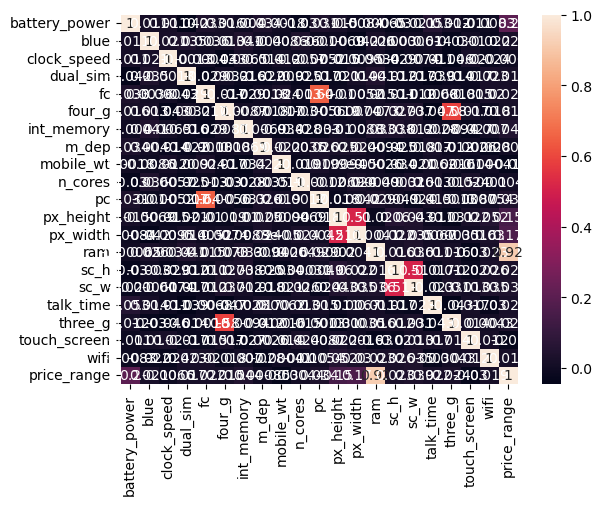

In [6]:
# Correlation between the variables
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [7]:
#Scaling
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
x=df.drop(['price_range'],axis=1)
x=scale(x)

In [8]:
#PCA
pca=PCA(n_components=4)

In [9]:
x=pca.fit_transform(x)

In [11]:
pd.DataFrame(x)

,0,1,2,3
0,0.389275,-2.634163,-0.538343,1.411501
1,-1.956432,0.587938,0.360335,-1.103478
2,-1.205395,0.163910,0.156566,-1.929310
3,-1.067770,-0.283318,1.726894,-0.140273
4,1.621698,1.269694,-0.280457,-1.937104
...,...,...,...,...
1995,-0.795752,0.545803,0.752389,-1.873165
1996,-1.499529,-0.793018,1.129395,-0.787547
1997,-1.290661,-0.145186,-0.802870,-2.061358
1998,-1.332417,0.976084,-0.877658,1.395941


In [12]:
y=df['price_range']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
#Model
model = Sequential()
model.add(Dense(120, activation="relu"))
model.add(Dense(80, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="sigmoid"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000)

Epoch 1/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5001 - loss: 1.0522 - val_accuracy: 0.2525 - val_loss: 1.8248
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.5256 - loss: 1.0153 - val_accuracy: 0.2625 - val_loss: 1.8532
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.5119 - loss: 1.0489 - val_accuracy: 0.2625 - val_loss: 1.8598
Epoch 4/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.5139 - loss: 1.0234 - val_accuracy: 0.2625 - val_loss: 1.8518
Epoch 5/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.5130 - loss: 1.0424 - val_accuracy: 0.2650 - val_loss: 1.8106
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.5222 - loss: 1.0452 - val_accuracy: 0.2425 - val_loss: 1.8658
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.5077 - loss: 1.0159 - val_accuracy: 0.2525 - val_loss: 1.8402
Epoch 8/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.5224 - loss: 1.0275 - va

Epoch 51/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.6154 - loss: 0.8590 - val_accuracy: 0.2400 - val_loss: 2.4547
Epoch 52/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.5940 - loss: 0.8912 - val_accuracy: 0.2700 - val_loss: 2.3538
Epoch 53/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.6163 - loss: 0.8645 - val_accuracy: 0.2600 - val_loss: 2.4741
Epoch 54/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.6218 - loss: 0.8418 - val_accuracy: 0.2425 - val_loss: 2.4556
Epoch 55/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.5971 - loss: 0.8934 - val_accuracy: 0.2800 - val_loss: 2.4870
Epoch 56/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.6164 - loss: 0.8427 - val_accuracy: 0.2525 - val_loss: 2.5161
Epoch 57/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.5979 - loss: 0.8565 - val_accuracy: 0.2475 - val_loss: 2.4610
Epoch 58/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.6180 - loss: 0

Epoch 101/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.6709 - loss: 0.7197 - val_accuracy: 0.2625 - val_loss: 3.0995
Epoch 102/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.6809 - loss: 0.7348 - val_accuracy: 0.2750 - val_loss: 3.0294
Epoch 103/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.7358 - loss: 0.6696 - val_accuracy: 0.2725 - val_loss: 3.1778
Epoch 104/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.6723 - loss: 0.7042 - val_accuracy: 0.2750 - val_loss: 3.2511
Epoch 105/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.6853 - loss: 0.7132 - val_accuracy: 0.2675 - val_loss: 3.2757
Epoch 106/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.6679 - loss: 0.7357 - val_accuracy: 0.2675 - val_loss: 3.4268
Epoch 107/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.6805 - loss: 0.7056 - val_accuracy: 0.2800 - val_loss: 3.1390
Epoch 108/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.7269 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.7162 - loss: 0.6221 - val_accuracy: 0.2450 - val_loss: 3.8059
Epoch 151/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.7337 - loss: 0.6188 - val_accuracy: 0.2600 - val_loss: 3.9346
Epoch 152/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.7070 - loss: 0.6614 - val_accuracy: 0.2650 - val_loss: 3.6181
Epoch 153/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.7309 - loss: 0.6145 - val_accuracy: 0.2900 - val_loss: 3.7259
Epoch 154/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.7353 - loss: 0.5888 - val_accuracy: 0.2825 - val_loss: 3.8428
Epoch 155/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.7428 - loss: 0.5884 - val_accuracy: 0.2675 - val_loss: 3.8310
Epoch 156/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.7525 - loss: 0.5996 - val_accuracy: 0.2650 - val_loss: 3.7910
Epoch 157/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.7320 - loss: 0.6251 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.7972 - loss: 0.5233 - val_accuracy: 0.2650 - val_loss: 4.3196
Epoch 200/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.7962 - loss: 0.4784 - val_accuracy: 0.2675 - val_loss: 4.4055
Epoch 201/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.7962 - loss: 0.4775 - val_accuracy: 0.2775 - val_loss: 4.4529
Epoch 202/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.7851 - loss: 0.5113 - val_accuracy: 0.2475 - val_loss: 4.5101
Epoch 203/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.7828 - loss: 0.5433 - val_accuracy: 0.2575 - val_loss: 4.4662
Epoch 204/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.7845 - loss: 0.5153 - val_accuracy: 0.2325 - val_loss: 4.3404
Epoch 205/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7668 - loss: 0.5373 - val_accuracy: 0.2550 - val_loss: 4.5796
Epoch 206/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.7876 - loss: 0.5195 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8157 - loss: 0.4573 - val_accuracy: 0.2850 - val_loss: 5.0934
Epoch 249/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.8064 - loss: 0.4719 - val_accuracy: 0.2775 - val_loss: 5.0312
Epoch 250/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8262 - loss: 0.4440 - val_accuracy: 0.2550 - val_loss: 4.9936
Epoch 251/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.7910 - loss: 0.5010 - val_accuracy: 0.2575 - val_loss: 4.9620
Epoch 252/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.7580 - loss: 0.5578 - val_accuracy: 0.2825 - val_loss: 4.9644
Epoch 253/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.7758 - loss: 0.5698 - val_accuracy: 0.2600 - val_loss: 5.0128
Epoch 254/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.7859 - loss: 0.5508 - val_accuracy: 0.2725 - val_loss: 4.8162
Epoch 255/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8090 - loss: 0.4676 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8186 - loss: 0.4722 - val_accuracy: 0.2425 - val_loss: 5.8356
Epoch 298/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8633 - loss: 0.3816 - val_accuracy: 0.2650 - val_loss: 5.5936
Epoch 299/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8533 - loss: 0.3862 - val_accuracy: 0.2550 - val_loss: 5.7190
Epoch 300/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8706 - loss: 0.3678 - val_accuracy: 0.2725 - val_loss: 5.6814
Epoch 301/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.8576 - loss: 0.3812 - val_accuracy: 0.2525 - val_loss: 5.6847
Epoch 302/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.8535 - loss: 0.4094 - val_accuracy: 0.2575 - val_loss: 5.8217
Epoch 303/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8280 - loss: 0.4236 - val_accuracy: 0.2700 - val_loss: 5.7144
Epoch 304/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8366 - loss: 0.4170 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.8225 - loss: 0.4747 - val_accuracy: 0.2475 - val_loss: 6.1048
Epoch 347/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.8549 - loss: 0.4289 - val_accuracy: 0.2550 - val_loss: 6.0475
Epoch 348/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8756 - loss: 0.3466 - val_accuracy: 0.2575 - val_loss: 6.1564
Epoch 349/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8637 - loss: 0.3581 - val_accuracy: 0.2500 - val_loss: 6.1056
Epoch 350/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.8610 - loss: 0.4025 - val_accuracy: 0.2575 - val_loss: 5.9595
Epoch 351/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8695 - loss: 0.3887 - val_accuracy: 0.2725 - val_loss: 5.9394
Epoch 352/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.8801 - loss: 0.3250 - val_accuracy: 0.2500 - val_loss: 5.7342
Epoch 353/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8720 - loss: 0.3595 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.8290 - loss: 0.4781 - val_accuracy: 0.2825 - val_loss: 6.2250
Epoch 396/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8457 - loss: 0.4289 - val_accuracy: 0.2725 - val_loss: 6.1915
Epoch 397/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8283 - loss: 0.4339 - val_accuracy: 0.2525 - val_loss: 6.2129
Epoch 398/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8696 - loss: 0.3697 - val_accuracy: 0.2575 - val_loss: 6.1247
Epoch 399/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.8816 - loss: 0.3377 - val_accuracy: 0.2450 - val_loss: 6.3769
Epoch 400/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.9102 - loss: 0.2948 - val_accuracy: 0.2400 - val_loss: 6.4715
Epoch 401/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9175 - loss: 0.2821 - val_accuracy: 0.2500 - val_loss: 6.6868
Epoch 402/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.9085 - loss: 0.2596 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.9260 - loss: 0.2577 - val_accuracy: 0.2525 - val_loss: 6.4853
Epoch 445/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.9229 - loss: 0.2564 - val_accuracy: 0.2500 - val_loss: 6.7246
Epoch 446/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.9279 - loss: 0.2496 - val_accuracy: 0.2575 - val_loss: 6.9618
Epoch 447/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.9128 - loss: 0.2729 - val_accuracy: 0.2425 - val_loss: 7.0362
Epoch 448/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9234 - loss: 0.2459 - val_accuracy: 0.2550 - val_loss: 6.9180
Epoch 449/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.9201 - loss: 0.2549 - val_accuracy: 0.2325 - val_loss: 6.9921
Epoch 450/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8926 - loss: 0.2890 - val_accuracy: 0.2300 - val_loss: 6.9259
Epoch 451/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8713 - loss: 0.3886 - v

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9099 - loss: 0.3121 - val_accuracy: 0.2425 - val_loss: 6.7868
Epoch 494/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.8899 - loss: 0.3184 - val_accuracy: 0.2425 - val_loss: 7.2277
Epoch 495/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.8870 - loss: 0.2992 - val_accuracy: 0.2550 - val_loss: 6.8318
Epoch 496/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8715 - loss: 0.3535 - val_accuracy: 0.2450 - val_loss: 7.5634
Epoch 497/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8963 - loss: 0.3289 - val_accuracy: 0.2700 - val_loss: 7.4124
Epoch 498/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8912 - loss: 0.3407 - val_accuracy: 0.2550 - val_loss: 7.2458
Epoch 499/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.8545 - loss: 0.4105 - val_accuracy: 0.2500 - val_loss: 7.3072
Epoch 500/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8231 - loss: 0.4886 - v

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8936 - loss: 0.3162 - val_accuracy: 0.2550 - val_loss: 7.4500
Epoch 543/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.9128 - loss: 0.2783 - val_accuracy: 0.2725 - val_loss: 7.2388
Epoch 544/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.9081 - loss: 0.2744 - val_accuracy: 0.2500 - val_loss: 7.3326
Epoch 545/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.9050 - loss: 0.2657 - val_accuracy: 0.2300 - val_loss: 7.5056
Epoch 546/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.9240 - loss: 0.2550 - val_accuracy: 0.2725 - val_loss: 7.1720
Epoch 547/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8616 - loss: 0.4070 - val_accuracy: 0.2550 - val_loss: 7.5505
Epoch 548/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.9004 - loss: 0.3185 - val_accuracy: 0.2425 - val_loss: 7.3126
Epoch 549/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9052 - loss: 0.2883 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8883 - loss: 0.3491 - val_accuracy: 0.2550 - val_loss: 7.5071
Epoch 592/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.9346 - loss: 0.2173 - val_accuracy: 0.2325 - val_loss: 7.6180
Epoch 593/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9310 - loss: 0.2241 - val_accuracy: 0.2575 - val_loss: 7.5577
Epoch 594/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.9448 - loss: 0.1958 - val_accuracy: 0.2550 - val_loss: 7.7559
Epoch 595/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.9520 - loss: 0.1813 - val_accuracy: 0.2575 - val_loss: 7.6239
Epoch 596/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.9463 - loss: 0.2044 - val_accuracy: 0.2600 - val_loss: 7.6256
Epoch 597/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.9404 - loss: 0.2261 - val_accuracy: 0.2575 - val_loss: 7.8277
Epoch 598/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.9470 - loss: 0.1966 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.9579 - loss: 0.1745 - val_accuracy: 0.2600 - val_loss: 7.8386
Epoch 641/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.9752 - loss: 0.1468 - val_accuracy: 0.2475 - val_loss: 7.7438
Epoch 642/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.9598 - loss: 0.1755 - val_accuracy: 0.2525 - val_loss: 8.1156
Epoch 643/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.9520 - loss: 0.1781 - val_accuracy: 0.2525 - val_loss: 7.7562
Epoch 644/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.9292 - loss: 0.2406 - val_accuracy: 0.2525 - val_loss: 8.2521
Epoch 645/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.9107 - loss: 0.2808 - val_accuracy: 0.2700 - val_loss: 7.5646
Epoch 646/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.9204 - loss: 0.2623 - val_accuracy: 0.2675 - val_loss: 7.6388
Epoch 647/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9154 - loss: 0.3024 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.8384 - loss: 0.4258 - val_accuracy: 0.2175 - val_loss: 7.9128
Epoch 690/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8427 - loss: 0.5332 - val_accuracy: 0.2575 - val_loss: 7.5576
Epoch 691/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.8727 - loss: 0.3626 - val_accuracy: 0.2625 - val_loss: 8.2060
Epoch 692/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.8841 - loss: 0.3157 - val_accuracy: 0.2425 - val_loss: 8.1298
Epoch 693/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8755 - loss: 0.3386 - val_accuracy: 0.2375 - val_loss: 7.9052
Epoch 694/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8947 - loss: 0.2921 - val_accuracy: 0.2575 - val_loss: 8.0759
Epoch 695/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8893 - loss: 0.4006 - val_accuracy: 0.2425 - val_loss: 7.5139
Epoch 696/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8689 - loss: 0.3961 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9322 - loss: 0.2170 - val_accuracy: 0.2625 - val_loss: 8.1235
Epoch 739/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.9553 - loss: 0.1710 - val_accuracy: 0.2600 - val_loss: 8.2233
Epoch 740/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.9618 - loss: 0.1622 - val_accuracy: 0.2500 - val_loss: 8.4445
Epoch 741/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.9515 - loss: 0.1968 - val_accuracy: 0.2775 - val_loss: 7.8732
Epoch 742/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.9612 - loss: 0.1918 - val_accuracy: 0.2625 - val_loss: 7.8147
Epoch 743/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.9392 - loss: 0.2089 - val_accuracy: 0.2325 - val_loss: 7.9913
Epoch 744/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9412 - loss: 0.2360 - val_accuracy: 0.2425 - val_loss: 8.0627
Epoch 745/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.9400 - loss: 0.2086 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.9253 - loss: 0.2423 - val_accuracy: 0.2775 - val_loss: 8.1656
Epoch 788/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9241 - loss: 0.2301 - val_accuracy: 0.2675 - val_loss: 8.3854
Epoch 789/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.9457 - loss: 0.2048 - val_accuracy: 0.2600 - val_loss: 8.4097
Epoch 790/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.9580 - loss: 0.1458 - val_accuracy: 0.2600 - val_loss: 8.4039
Epoch 791/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.9661 - loss: 0.1443 - val_accuracy: 0.2550 - val_loss: 8.4249
Epoch 792/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9742 - loss: 0.1241 - val_accuracy: 0.2625 - val_loss: 8.2616
Epoch 793/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.9736 - loss: 0.1229 - val_accuracy: 0.2575 - val_loss: 8.2394
Epoch 794/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.9489 - loss: 0.1752 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8646 - loss: 0.3930 - val_accuracy: 0.2925 - val_loss: 7.5768
Epoch 837/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.8650 - loss: 0.4024 - val_accuracy: 0.2575 - val_loss: 8.3563
Epoch 838/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8924 - loss: 0.3474 - val_accuracy: 0.2675 - val_loss: 7.9751
Epoch 839/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9338 - loss: 0.2273 - val_accuracy: 0.2475 - val_loss: 8.0172
Epoch 840/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9679 - loss: 0.1485 - val_accuracy: 0.2500 - val_loss: 8.1627
Epoch 841/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.9597 - loss: 0.1464 - val_accuracy: 0.2525 - val_loss: 8.1705
Epoch 842/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.9817 - loss: 0.1087 - val_accuracy: 0.2775 - val_loss: 8.0495
Epoch 843/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.9764 - loss: 0.1257 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.9547 - loss: 0.1497 - val_accuracy: 0.2575 - val_loss: 8.1548
Epoch 886/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9779 - loss: 0.1081 - val_accuracy: 0.2550 - val_loss: 8.3668
Epoch 887/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.9774 - loss: 0.1106 - val_accuracy: 0.2725 - val_loss: 8.5822
Epoch 888/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9460 - loss: 0.2038 - val_accuracy: 0.2375 - val_loss: 8.3332
Epoch 889/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.9245 - loss: 0.2463 - val_accuracy: 0.2475 - val_loss: 8.4313
Epoch 890/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8755 - loss: 0.4173 - val_accuracy: 0.2350 - val_loss: 8.1506
Epoch 891/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.8994 - loss: 0.3186 - val_accuracy: 0.2575 - val_loss: 7.7818
Epoch 892/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8794 - loss: 0.3609 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9816 - loss: 0.0887 - val_accuracy: 0.2825 - val_loss: 8.4663
Epoch 935/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.9835 - loss: 0.0961 - val_accuracy: 0.2525 - val_loss: 8.7928
Epoch 936/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.9812 - loss: 0.0800 - val_accuracy: 0.2750 - val_loss: 8.5661
Epoch 937/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.9864 - loss: 0.0874 - val_accuracy: 0.2475 - val_loss: 8.7780
Epoch 938/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.9805 - loss: 0.0937 - val_accuracy: 0.2575 - val_loss: 8.6562
Epoch 939/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.9842 - loss: 0.0856 - val_accuracy: 0.2625 - val_loss: 8.7207
Epoch 940/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9861 - loss: 0.0788 - val_accuracy: 0.2550 - val_loss: 9.1755
Epoch 941/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.9763 - loss: 0.0983 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9901 - loss: 0.0654 - val_accuracy: 0.2600 - val_loss: 8.5859
Epoch 984/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.9896 - loss: 0.0666 - val_accuracy: 0.2525 - val_loss: 8.7807
Epoch 985/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9871 - loss: 0.0752 - val_accuracy: 0.2575 - val_loss: 8.9656
Epoch 986/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.9853 - loss: 0.0857 - val_accuracy: 0.2525 - val_loss: 8.7143
Epoch 987/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9632 - loss: 0.1219 - val_accuracy: 0.2600 - val_loss: 8.9824
Epoch 988/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.9498 - loss: 0.1747 - val_accuracy: 0.2625 - val_loss: 9.1270
Epoch 989/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9145 - loss: 0.2839 - val_accuracy: 0.2550 - val_loss: 9.0138
Epoch 990/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.8994 - loss: 0.3589 -

In [20]:
model.save('mobile_price.h5')